In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<!-- BEGIN QUESTION -->



In [3]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm.sklearn import LGBMRegressor
import shap

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_This dataset has many examples and 16 features. There are a lot of examples for which the target value does not exist (since the listing has no reviews) so some data cleaning needs to be done. This problem is a regression problem since the target value ranges continuously._

In [4]:
nyc_airbnb_df = pd.read_csv("./data/AB_NYC_2019.csv")
nyc_airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
nyc_train, nyc_test= train_test_split(nyc_airbnb_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_3. Firstly, some features seems to not have any effect on the amount of reviews per month, namely id, and availability_365, and some features are similar to others (host_id, latitude, longitude). The last review feature is in date format which is difficult to transform._

In [6]:
nyc_train.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,34216,3.422600e+04,34209,34226,34226,34226.000000,34226.000000,34226,34226.000000,34226.000000,34226.000000,27236,27236.000000,34226.000000,34226.000000
unique,NaN,33662,NaN,9201,5,218,NaN,NaN,3,NaN,NaN,NaN,1676,NaN,NaN,NaN
top,NaN,Home away from home,NaN,David,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,14,NaN,292,15176,2728,NaN,NaN,17848,NaN,NaN,NaN,984,NaN,NaN,NaN
mean,1.893979e+07,NaN,6.726273e+07,NaN,NaN,NaN,40.729142,-73.952083,NaN,151.528399,7.094957,23.244814,NaN,1.369816,7.042453,112.526004
std,1.101332e+07,NaN,7.840511e+07,NaN,NaN,NaN,0.054531,0.046201,NaN,236.628392,21.548290,44.573323,NaN,1.700737,32.590803,131.420031
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.394482e+06,NaN,7.721897e+06,NaN,NaN,NaN,40.690193,-73.983030,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.954546e+07,NaN,3.074526e+07,NaN,NaN,NaN,40.723240,-73.955550,NaN,106.000000,3.000000,5.000000,NaN,0.710000,1.000000,45.000000
75%,2.915085e+07,NaN,1.068375e+08,NaN,NaN,NaN,40.763287,-73.936270,NaN,175.000000,5.000000,23.000000,NaN,2.000000,2.000000,225.750000


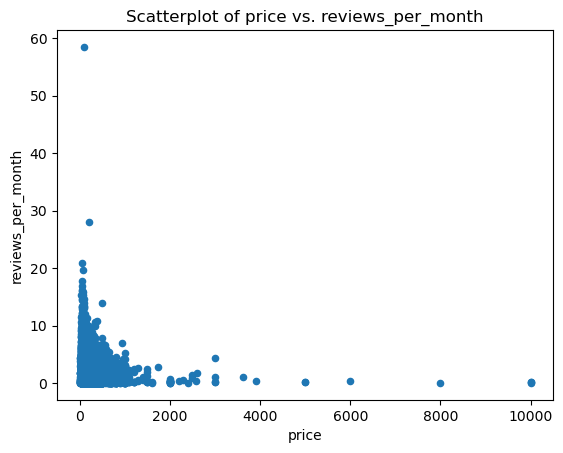

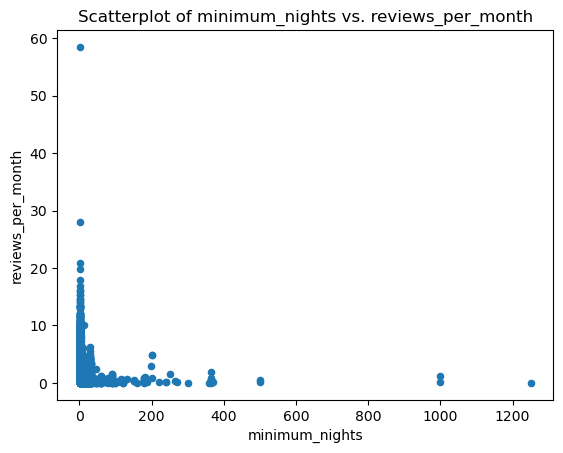

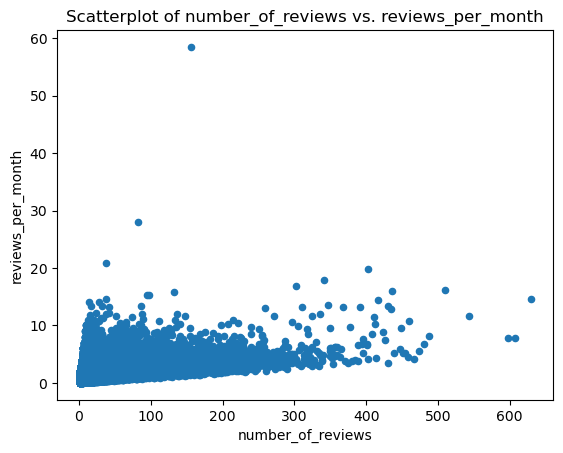

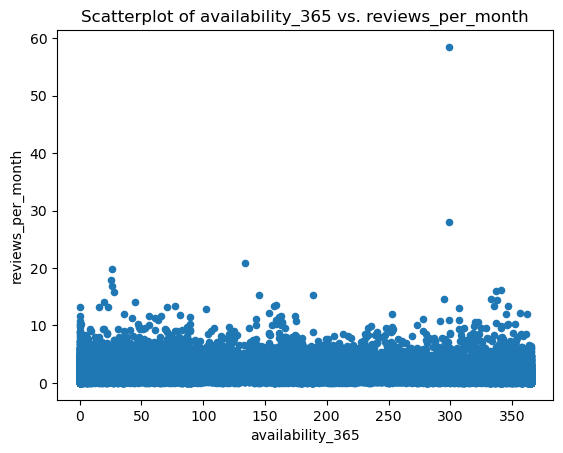

In [7]:
scatterplot_cols = ["price", "minimum_nights", "number_of_reviews", "availability_365"]
for col in scatterplot_cols:
    nyc_train.plot.scatter(x=col, y="reviews_per_month")
    plt.title("Scatterplot of "+ col + " vs. reviews_per_month")
    plt.show()

In [8]:
# The scatterplot for price vs. reviews_per_month shows that the cheaper the listing, the more reviews it gets.

In [9]:
# The scatterplot for minimum_nights vs. reviews_per_month shows that the longer people have to stay at a listing,
# the less reviews it gets.

In [10]:
# The scatterplot for number_of_reviews vs. reviews_per_month shows that as the total amount of reviews increase, the average
# amount of reviews increase.

In [11]:
# The scatterplot for availability_365 vs. reviews_per_month shows that there is not a strong correlation between how long a 
# listing is available for and the number of reviews it gets per month.

In [12]:
nyc_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

In [15]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

_Done below with preprocessing exercise._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

_1. The target column has missing values so we should fill in the NaN values with zeros. The last_review feature can't be used as is, so we import the nltk library and create day, month, and year features from it (that are categorical not numeric).
2. There are numeric features (listed below) where we apply imputation and scaling, categorical features that we apply One Hot Encoding, features to be discretized, free text features to be made into Bag of Words features, and finally features to be dropped._

In [16]:
nyc_train_reviews_per_month = nyc_train["reviews_per_month"].replace(np.nan, 0)
nyc_test_reviews_per_month = nyc_test["reviews_per_month"].replace(np.nan, 0)
nyc_train["reviews_per_month"] = nyc_train_reviews_per_month
nyc_test["reviews_per_month"] = nyc_test_reviews_per_month

nyc_train_name = nyc_train["name"].replace(np.nan, "")
nyc_test_name = nyc_test["name"].replace(np.nan, "")
nyc_train["name"] = nyc_train_name
nyc_test["name"] = nyc_test_name

nyc_train_host_name = nyc_train["host_name"].replace(np.nan, "")
nyc_test_host_name = nyc_test["host_name"].replace(np.nan, "")
nyc_train["host_name"] = nyc_train_host_name
nyc_test["host_name"] = nyc_test_host_name

def get_day(text):
    if (type(text) == float):
        return "00"
    return text[8:10]
def get_month(text):
    if (type(text) == float):
        return "00"
    return text[5:7]
def get_year(text):
    if (type(text) == float):
        return "0000"
    return text[0:4]

nyc_train = nyc_train.assign(year_last_review=nyc_train["last_review"].apply(get_year))
nyc_train = nyc_train.assign(month_last_review=nyc_train["last_review"].apply(get_month))
nyc_train = nyc_train.assign(day_last_review=nyc_train["last_review"].apply(get_day))

nyc_test = nyc_test.assign(year_last_review=nyc_test["last_review"].apply(get_year))
nyc_test = nyc_test.assign(month_last_review=nyc_test["last_review"].apply(get_month))
nyc_test = nyc_test.assign(day_last_review=nyc_test["last_review"].apply(get_day))

nyc_train_X = nyc_train.drop(columns=["reviews_per_month"])
nyc_train_y = nyc_train["reviews_per_month"]
nyc_train_X.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,year_last_review,month_last_review,day_last_review
36150,28736148,Cozy 1 Bedroom Apt in Hamilton Heights,43431867,Tommy,Manhattan,Washington Heights,40.83256,-73.94440,Entire home/apt,96,4,0,NaN,1,17,0000,00,00
45223,34613254,Amazing One Bedroom at the Time Square Area/72B,48146336,Irina,Manhattan,Hell's Kitchen,40.76134,-73.99299,Entire home/apt,150,30,0,NaN,20,332,0000,00,00
14316,11144496,"New Spacious Master, Williamsburg",48819868,Nick,Brooklyn,Williamsburg,40.71119,-73.95097,Private room,200,1,0,NaN,1,0,0000,00,00
1691,766814,Adorable Midtown West Studio!,4022922,Caitlin,Manhattan,Hell's Kitchen,40.75900,-73.99530,Entire home/apt,95,1,0,NaN,1,0,0000,00,00
20195,16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,1,0,2016,12,11


In [17]:
numeric_feats = ["price", "minimum_nights", "calculated_host_listings_count", "availability_365"]
categorical_feats = ["neighbourhood_group", "neighbourhood", "room_type", "year_last_review", "month_last_review", "day_last_review"]
drop_feats = ["id", "host_id", "number_of_reviews", "last_review"]
discretized_feats = ["latitude", "longitude"]
text_feats = ["name", "host_name"]

In [18]:
nyc_ct = make_column_transformer((StandardScaler(), numeric_feats),
                                 ("drop", drop_feats),
                                 (KBinsDiscretizer(n_bins=20, encode="onehot"), discretized_feats),
                                 (CountVectorizer(stop_words="english"), "name"),
                                 (CountVectorizer(stop_words="english"), "host_name"),
                                 (OneHotEncoder(handle_unknown="ignore"), categorical_feats))
nyc_ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['price', 'minimum_nights',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('drop', 'drop',
                                 ['id', 'host_id', 'number_of_reviews',
                                  'last_review']),
                                ('kbinsdiscretizer',
                                 KBinsDiscretizer(n_bins=20),
                                 ['latitude', 'longitude']),
                                ('countvectorizer-1',
                                 CountVectorizer(stop_words='english'),
                                 'name'),
                                ('countvectorizer-2',
                                 CountVectorizer(stop_words='english'),
                                 'host_name'),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'neighbourhood',
                                  'room_type', 'year_last_review',
                                  'month_last_review', 'day_last_review'])])

In [19]:
...

Ellipsis

In [20]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [21]:
nyc_dummy = DummyRegressor(strategy="median")

In [22]:
dummy_scores = cross_validate(nyc_dummy, nyc_train_X, nyc_train_y, return_train_score=True)
pd.DataFrame(dummy_scores)

,fit_time,score_time,test_score,train_score
0,0.007692,0.000829,-0.201239,-0.198334
1,0.005696,0.000798,-0.198125,-0.192261
2,0.004802,0.001425,-0.180641,-0.204150
3,0.008669,0.001125,-0.214249,-0.195358
4,0.005533,0.000872,-0.192307,-0.193726


In [23]:
...

Ellipsis

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_4. The alpha with the highest mean validation score for the least difference between the mean training and validation scores is 10 as seen by the table 3 cells below._

In [24]:
nyc_pipe = make_pipeline(nyc_ct, Ridge())
ridge_scores = cross_validate(nyc_pipe, nyc_train_X, nyc_train_y, return_train_score=True, n_jobs=-1)

In [25]:
alpha_vals = 10.0 ** np.arange(-3, 6, 1)
mean_train_scores = []
mean_valid_scores = []
std_train_scores = []
std_valid_scores = []
for alpha in alpha_vals:
    linear_regression = Ridge(alpha=alpha)
    pipe = make_pipeline(nyc_ct, linear_regression)
    scores = cross_validate(pipe, nyc_train_X, nyc_train_y, return_train_score=True, n_jobs=-1)
    mean_train_scores.append(scores["train_score"].mean())
    mean_valid_scores.append(scores["test_score"].mean())
    std_train_scores.append(scores["train_score"].std())
    std_valid_scores.append(scores["test_score"].std())

In [26]:
pd.DataFrame({"average training scores": mean_train_scores,
              "average validation scores": mean_valid_scores, 
              "standard deviation of training scores": std_train_scores,
              "standard deviation of validation scores": std_valid_scores}, index=alpha_vals)

,average training scores,average validation scores,standard deviation of training scores,standard deviation of validation scores
0.001,0.741464,0.319826,0.005166,0.015495
0.010,0.741415,0.327683,0.005166,0.015095
0.100,0.738952,0.371146,0.005160,0.013146
1.000,0.698537,0.453366,0.004706,0.009974
10.000,0.584083,0.484120,0.004328,0.017887
100.000,0.504874,0.477607,0.005461,0.022988
1000.000,0.455941,0.450496,0.006048,0.024112
10000.000,0.328273,0.327773,0.004989,0.019078
100000.000,0.101298,0.101362,0.001779,0.006332


In [27]:
best_nyc_linear_pipe = make_pipeline(nyc_ct, Ridge(alpha=10))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Decision Tree model is overfitting and LightGBM is underfitting. Random Forest model has the longest fit time with LightGBM being the fastest. LightGBM has the longest scoring time however all models are similarly timed._

In [28]:
decision_tree_pipe = make_pipeline(nyc_ct, DecisionTreeRegressor())
decision_tree_scores = cross_validate(decision_tree_pipe, nyc_train_X, nyc_train_y, return_train_score=True, n_jobs=-1)

knn_pipe = make_pipeline(nyc_ct, KNeighborsRegressor())
knn_scores = cross_validate(knn_pipe, nyc_train_X, nyc_train_y, return_train_score=True, n_jobs=-1)

In [29]:
lgbm_pipe = make_pipeline(nyc_ct, LGBMRegressor(random_state=123, verbose=-1))
lgbm_scores = cross_validate(lgbm_pipe, nyc_train_X, nyc_train_y, return_train_score=True, n_jobs=-1)

results_dict = {"decision tree training scores": decision_tree_scores["train_score"], 
                "kNN training scores": knn_scores["train_score"], 
                "lightgbm training scores": lgbm_scores["train_score"],
                "decision tree validation scores": decision_tree_scores["test_score"],
                "kNN validation scores": knn_scores["test_score"],
                "lightgbm validation scores": lgbm_scores["test_score"],
                "decision tree fit time": decision_tree_scores["fit_time"],
                "kNN fit time": knn_scores["fit_time"],
                "lightgbm fit time": lgbm_scores["fit_time"],
                "decision tree score time": decision_tree_scores["score_time"],
                "kNN score time": knn_scores["score_time"],
                "lightgbm score time": lgbm_scores["score_time"]}
pd.DataFrame(results_dict)

,decision tree training scores,kNN training scores,lightgbm training scores,decision tree validation scores,kNN validation scores,lightgbm validation scores,decision tree fit time,kNN fit time,lightgbm fit time,decision tree score time,kNN score time,lightgbm score time
0,1.0,0.613188,0.684005,0.307449,0.426228,0.617718,28.992100,1.071351,3.948233,0.286018,134.626040,0.366546
1,1.0,0.606894,0.686746,0.318024,0.420123,0.609610,29.260532,1.084539,4.086149,0.231985,135.379722,0.381480
2,1.0,0.617894,0.691479,0.416670,0.384803,0.558495,28.013796,1.027296,3.989043,0.288480,135.063397,0.368318
3,1.0,0.613533,0.682680,0.320856,0.434887,0.626895,29.168456,1.049085,3.996888,0.237875,134.448952,0.385042
4,1.0,0.618944,0.688017,0.329659,0.410718,0.600312,28.993442,1.082353,3.814662,0.256665,134.702014,0.379360


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_The best parameters found for the LightGBM model is having the most number of estimators, depth of the trees to be 100, the learning rate (how much it fixes mistakes) to be at a ratio of 0.1, with the count vectorizers of name and host_name to have 25 and 50 maximum words that are in all the train text data. The best parameter amount for the kNN model is having k=21; the score is the highest with that k._

In [33]:
lgbm_param_grid = {
    "columntransformer__countvectorizer-1__max_features": [10, 25, 50, 100, 200],
    "columntransformer__countvectorizer-2__max_features": [10, 25, 50, 100, 200],
    "lgbmregressor__n_estimators": [10, 25, 50, 100],
    "lgbmregressor__max_depth": [10, 20, 50, 100, 200],
    "lgbmregressor__learning_rate": [0.1, 0.3, 0.5, 0.8, 1],
}

lgbm_random_search = RandomizedSearchCV(lgbm_pipe,                                    
                  param_distributions = lgbm_param_grid, 
                  n_iter=50, 
                  n_jobs=-1, 
                  return_train_score=True)

In [34]:
lgbm_random_search.fit(nyc_train_X, nyc_train_y)
pd.DataFrame(lgbm_random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lgbmregressor__n_estimators,param_lgbmregressor__max_depth,param_lgbmregressor__learning_rate,param_columntransformer__countvectorizer-2__max_features,param_columntransformer__countvectorizer-1__max_features,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.686085,0.248744,0.313664,0.017605,10,200,0.8,25,100,"{'lgbmregressor__n_estimators': 10, 'lgbmregre...",...,0.568535,0.016938,31,0.659386,0.648655,0.655266,0.653312,0.656757,0.654675,0.003605
1,2.475545,0.163098,0.341977,0.031696,10,200,0.5,50,50,"{'lgbmregressor__n_estimators': 10, 'lgbmregre...",...,0.589044,0.026836,15,0.641688,0.642653,0.654458,0.644367,0.651492,0.646932,0.005096
2,3.567890,0.192214,0.369315,0.057972,25,200,0.3,200,10,"{'lgbmregressor__n_estimators': 25, 'lgbmregre...",...,0.600362,0.020718,5,0.666408,0.660896,0.672608,0.664084,0.671563,0.667112,0.004434
3,4.381271,0.471941,0.352627,0.016434,50,10,1,50,10,"{'lgbmregressor__n_estimators': 50, 'lgbmregre...",...,0.511128,0.017215,40,0.741592,0.748377,0.745068,0.746090,0.747660,0.745758,0.002384
4,2.246858,0.275340,0.329547,0.029354,10,10,1,10,10,"{'lgbmregressor__n_estimators': 10, 'lgbmregre...",...,0.555228,0.013110,33,0.649032,0.640763,0.651974,0.643575,0.644277,0.645924,0.004028
5,4.058850,0.181662,0.330046,0.023155,25,20,0.5,200,50,"{'lgbmregressor__n_estimators': 25, 'lgbmregre...",...,0.590305,0.023295,14,0.684573,0.683345,0.691798,0.682079,0.690086,0.686376,0.003849
6,5.098244,0.175191,0.340611,0.009657,50,100,1,200,200,"{'lgbmregressor__n_estimators': 50, 'lgbmregre...",...,0.504179,0.011808,46,0.759161,0.753958,0.753973,0.756428,0.761449,0.756994,0.002939
7,4.598976,0.352666,0.334973,0.016613,50,200,1,100,10,"{'lgbmregressor__n_estimators': 50, 'lgbmregre...",...,0.510643,0.014276,41,0.747349,0.750037,0.747345,0.748421,0.749624,0.748555,0.001120
8,3.866545,0.369394,0.358850,0.015739,25,50,0.5,25,25,"{'lgbmregressor__n_estimators': 25, 'lgbmregre...",...,0.593075,0.020556,9,0.684707,0.683393,0.683964,0.685231,0.687721,0.685003,0.001496
9,4.321276,0.255633,0.352626,0.014536,25,200,0.1,10,100,"{'lgbmregressor__n_estimators': 25, 'lgbmregre...",...,0.580762,0.027440,27,0.610426,0.610413,0.622449,0.606585,0.613847,0.612744,0.005369


In [35]:
lgbm_params = lgbm_random_search.best_params_
lgbm_params

{'lgbmregressor__n_estimators': 100,
 'lgbmregressor__max_depth': 50,
 'lgbmregressor__learning_rate': 0.1,
 'columntransformer__countvectorizer-2__max_features': 10,
 'columntransformer__countvectorizer-1__max_features': 25}

In [36]:
new_nyc_ct = make_column_transformer((StandardScaler(), numeric_feats),
                                 ("drop", drop_feats),
                                 (KBinsDiscretizer(n_bins=20, encode="onehot"), discretized_feats),
                                 (CountVectorizer(stop_words="english", max_features=lgbm_params["columntransformer__countvectorizer-1__max_features"]), "name"),
                                 (CountVectorizer(stop_words="english", max_features=lgbm_params["columntransformer__countvectorizer-2__max_features"]), "host_name"),
                                 (OneHotEncoder(handle_unknown="ignore"), categorical_feats))
best_lgbm = make_pipeline(new_nyc_ct, LGBMRegressor(n_estimators=lgbm_params["lgbmregressor__n_estimators"], max_depth=lgbm_params["lgbmregressor__max_depth"], learning_rate=lgbm_params["lgbmregressor__learning_rate"], random_state=123, verbose=-1))
(new_nyc_ct, best_lgbm)

(ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  ['price', 'minimum_nights',
                                   'calculated_host_listings_count',
                                   'availability_365']),
                                 ('drop', 'drop',
                                  ['id', 'host_id', 'number_of_reviews',
                                   'last_review']),
                                 ('kbinsdiscretizer',
                                  KBinsDiscretizer(n_bins=20),
                                  ['latitude', 'longitude']),
                                 ('countvectorizer-1',
                                  CountVectorizer(max_features=25,
                                                  stop_words='english'),
                                  'name'),
                                 ('countvectorizer-2',
                                  CountVectorizer(max_features=10,
                            

In [37]:
knn_param_grid = {
    "kneighborsregressor__n_neighbors": [5, 15, 21, 35, 50],
}
knn_search_pipe = make_pipeline(new_nyc_ct, KNeighborsRegressor())
knn_random_search = RandomizedSearchCV(knn_search_pipe,                                    
                  param_distributions = knn_param_grid, 
                  n_iter=5, 
                  n_jobs=-1, 
                  return_train_score=True)
knn_random_search.fit(nyc_train_X, nyc_train_y)
pd.DataFrame(knn_random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.583344,0.032447,149.481681,0.420477,5,{'kneighborsregressor__n_neighbors': 5},0.383636,0.404145,0.393586,0.413745,...,0.395001,0.012605,5,0.594499,0.593399,0.600546,0.589097,0.592989,0.594106,0.003700
1,1.913409,0.274135,140.154030,11.393536,15,{'kneighborsregressor__n_neighbors': 15},0.460947,0.448396,0.415989,0.465612,...,0.446648,0.017470,3,0.511698,0.512425,0.519180,0.509240,0.517448,0.513998,0.003719
2,1.915573,0.156984,126.318302,0.204357,21,{'kneighborsregressor__n_neighbors': 21},0.466690,0.451944,0.408737,0.464138,...,0.447632,0.020823,1,0.490759,0.495627,0.505819,0.493475,0.499641,0.497064,0.005253
3,1.976750,0.109629,124.961693,0.577497,35,{'kneighborsregressor__n_neighbors': 35},0.465831,0.452729,0.403594,0.468138,...,0.447255,0.023320,2,0.472516,0.475031,0.486658,0.469986,0.477161,0.476270,0.005724
4,2.569641,0.283051,103.129485,42.636556,50,{'kneighborsregressor__n_neighbors': 50},0.465418,0.446168,0.398828,0.469512,...,0.444643,0.025113,4,0.461191,0.464183,0.476520,0.457728,0.466009,0.465126,0.006352


In [38]:
knn_params = knn_random_search.best_params_
knn_params

{'kneighborsregressor__n_neighbors': 21}

In [39]:
best_knn = make_pipeline(new_nyc_ct, KNeighborsRegressor(n_neighbors=knn_params["kneighborsregressor__n_neighbors"]))
best_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['price', 'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('drop', 'drop',
                                                  ['id', 'host_id',
                                                   'number_of_reviews',
                                                   'last_review']),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(n_bins=20),
                                                  ['latitude', 'longitude']),
                                                 ('countvectorizer-1',
                                                  Coun...5,
                                                                  stop_words='english'),
                                                  'name'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(max_features=10,
                                                                  stop_words='english'),
                                                  'host_name'),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighbourhood_group',
                                                   'neighbourhood', 'room_type',
                                                   'year_last_review',
                                                   'month_last_review',
                                                   'day_last_review'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=21))])

In [40]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_The feature after transformation that is the most important to the reviews per month is if the last_review year was in 2019. It also depends on how many minimum nights someone can stay at the listing, and if the last_review was posted during June or July._

In [41]:
nyc_train_X_transformed = new_nyc_ct.fit_transform(nyc_train_X)
best_lgbm.named_steps["lgbmregressor"].fit(nyc_train_X_transformed, nyc_train_y)
lgbm_explainer = shap.TreeExplainer(best_lgbm.named_steps["lgbmregressor"])

In [42]:
train_lgbm_shap_values = lgbm_explainer.shap_values(nyc_train_X_transformed)
pd.DataFrame(train_lgbm_shap_values).shape

(34226, 1)

In [43]:
feature_names = (numeric_feats
                 + new_nyc_ct.named_transformers_["kbinsdiscretizer"].get_feature_names_out().tolist()
                 + new_nyc_ct.named_transformers_["countvectorizer-1"].get_feature_names_out().tolist()
                 + new_nyc_ct.named_transformers_["countvectorizer-2"].get_feature_names_out().tolist()
                 + new_nyc_ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist())
values = np.abs(train_lgbm_shap_values).mean(0)
pd.DataFrame(data=values, columns=feature_names).T.sort_values(by=0, ascending=False).head(10)

,0
year_last_review_2019,0.727257
minimum_nights,0.255616
month_last_review_06,0.239142
month_last_review_07,0.216430
availability_365,0.090021
price,0.043925
year_last_review_2018,0.038190
year_last_review_0000,0.033180
calculated_host_listings_count,0.030931
room_type_Entire home/apt,0.022077


In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_2. The test score agrees with the validation score from the LightGBM cross validation. Since the data has a big size with more than enough examples in the training data, there is little optimization bias. 3. The first SHAP plot: all features (especially the last review being in 2019) except the month of the last review being July is pushing the score higher from the base value to 3.58 reviews per month. The second SHAP plot: Since the last review was not done in 2019 (and that feature being the most important feature as seen by its SHAP value), the review is pushed back lower than the base value._

In [52]:
best_lgbm.fit(nyc_train_X, nyc_train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['price', 'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('drop', 'drop',
                                                  ['id', 'host_id',
                                                   'number_of_reviews',
                                                   'last_review']),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(n_bins=20),
                                                  ['latitude', 'longitude']),
                                                 ('countvectorizer-1',
                                                  Coun...
                                                                  stop_words='english'),
                                                  'name'),
                                                 ('countvectorizer-2',
                                                  CountVectorizer(max_features=10,
                                                                  stop_words='english'),
                                                  'host_name'),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighbourhood_group',
                                                   'neighbourhood', 'room_type',
                                                   'year_last_review',
                                                   'month_last_review',
                                                   'day_last_review'])])),
                ('lgbmregressor',
                 LGBMRegressor(max_depth=50, random_state=123, verbose=-1))])

In [53]:
nyc_test_X = nyc_test.drop(columns=["reviews_per_month"])
nyc_test_y = nyc_test["reviews_per_month"]
test_score = best_lgbm.score(nyc_test_X, nyc_test_y)

In [54]:
test_score

0.6091879012473151

In [55]:
nyc_test_X_transformed = new_nyc_ct.transform(nyc_test_X)
test_lgbm_shap_values = lgbm_explainer.shap_values(nyc_test_X_transformed)

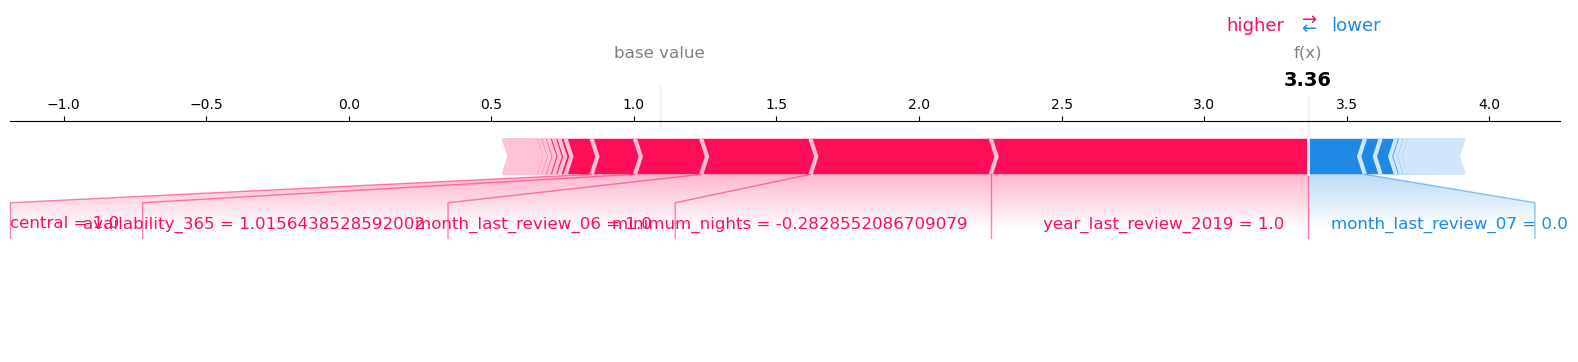

In [56]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values.toarray()[3, :],
    nyc_test_X_transformed.toarray()[3],
    feature_names=feature_names,
    matplotlib=True,
)

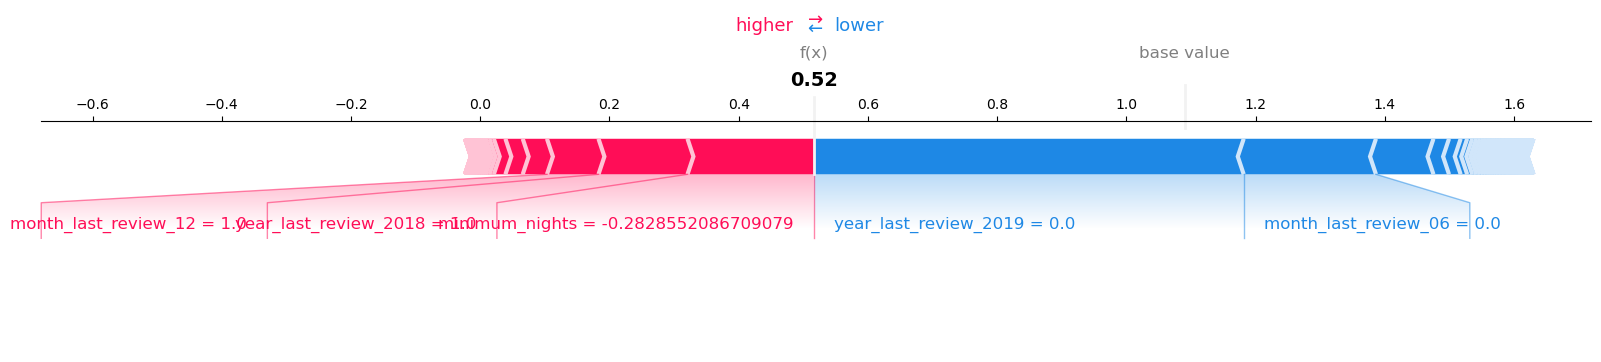

In [57]:
shap.force_plot(
    lgbm_explainer.expected_value,
    test_lgbm_shap_values.toarray()[1, :],
    nyc_test_X_transformed.toarray()[1],
    feature_names=feature_names,
    matplotlib=True,
)

In [58]:
pd.DataFrame(nyc_test_X_transformed.toarray(), columns=feature_names).head()

,price,minimum_nights,calculated_host_listings_count,availability_365,latitude_0.0,latitude_1.0,latitude_2.0,latitude_3.0,latitude_4.0,latitude_5.0,...,day_last_review_22,day_last_review_23,day_last_review_24,day_last_review_25,day_last_review_26,day_last_review_27,day_last_review_28,day_last_review_29,day_last_review_30,day_last_review_31
0,-0.492460,-0.190039,-0.185406,-0.856244,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.281155,-0.282855,-0.185406,-0.742105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.407938,-0.097223,-0.185406,-0.856244,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.221990,-0.282855,-0.185406,1.015644,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.323416,-0.236447,-0.185406,-0.856244,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_2. LightGBM is giving the best scores of all models in terms of accuracy and fit and score times. It is not the most interpretable, but with the help of SHAP values and SHAP force plots, predictions can be explained. From the SHAP values we can see that the most valuable feature after transformation is if the latest review was made in the year 2019, which heavily shifts the prediction to higher values if yes. 3. I could have done more hyperparameter optimization and feature selection could help seeing as there are many features after transforming that do not have a big impact on the final prediction of the reviews per month. 4. Final test score = 0.6072529313839559 using R^2_

In [62]:
all_scores = {"dummy": dummy_scores,
              "ridge": ridge_scores,
              "decision tree": decision_tree_scores,
              "knn": knn_scores,
              "lgbm": lgbm_scores}
pd.DataFrame(all_scores).T

,fit_time,score_time,test_score,train_score
dummy,"[0.007692098617553711, 0.00569605827331543, 0....","[0.0008289813995361328, 0.0007979869842529297,...","[-0.2012387526888606, -0.19812533648332886, -0...","[-0.19833382932822907, -0.1922605141972058, -0..."
ridge,"[2.219532012939453, 2.1910200119018555, 2.2142...","[0.23372173309326172, 0.22181200981140137, 0.2...","[0.4441373204070529, 0.46395277854719197, 0.43...","[0.6988600298561776, 0.6955357083881393, 0.707..."
decision tree,"[28.99210000038147, 29.26053214073181, 28.0137...","[0.28601813316345215, 0.23198485374450684, 0.2...","[0.30744862565054176, 0.3180240500069035, 0.41...","[0.9999995457831543, 0.9999997473981103, 1.0, ..."
knn,"[1.0713510513305664, 1.0845389366149902, 1.027...","[134.62604022026062, 135.37972235679626, 135.0...","[0.42622780966743024, 0.42012295786226417, 0.3...","[0.6131877642368722, 0.6068936465864126, 0.617..."
lgbm,"[3.948232889175415, 4.086148977279663, 3.98904...","[0.3665459156036377, 0.38147997856140137, 0.36...","[0.6177176177922317, 0.6096100964522873, 0.558...","[0.6840050906024069, 0.6867462025947157, 0.691..."


In [63]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

_There are so many different ML models just in this course all with their advantages and disadvantages, and I am excited to research about other models that were not talked about in this course._

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)